# K Means Clustering and PCA

This project explores two fundamental unsupervised learning techniques: Principal Component Analysis (PCA) for dimensionality reduction and K Means for clustering. Unsupervised learning is used when we do not have pre-labeled data; instead, the goal is to find interesting patterns or structures within the data itself.

<img src="kmeans1.png" width="600"/>

<img src="pca1.png" width="600"/>

For a bit of background:

**Principal Component Analysis**
PCA is a dimensionality reduction technique used to transform a large set of variables into a smaller one that still contains most of the information in the large set. It works by identifying "principal components," which are new, uncorrelated variables that successively maximize variance. The first principal component accounts for the most variation in the original data, the second for the second most, and so on. This is particularly useful for visualizing high-dimensional data in 2D or 3D.

**K Means Clustering**
K Means is an algorithm that aims to partition a set of observations into 'k' distinct, non-overlapping clusters. It works iteratively to assign each data point to one of the 'k' groups based on the features provided. The data points are clustered based on feature similarity, which is typically measured by Euclidean distance.

## Objective

In this notebook, our goal is to use the audio features from the Spotify dataset to group songs into distinct clusters. We hypothesize that these clusters might correspond to different moods, styles, or implicit genres not captured by the explicit 'genre' label.


We will first use PCA to reduce the many audio features (like danceability, energy, loudness, etc.) into two principal components for visualization. Then, we will apply K-Means clustering to this reduced data to identify groups of similar songs.

We will use the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

Start by importing them, and then loading our dataset:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

df = pd.read_csv('SpotifyFeatures.csv')

Select the specific audio features we will be using for clustering (and scale appropriately):

In [6]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now we will apply PCA to our dataset.

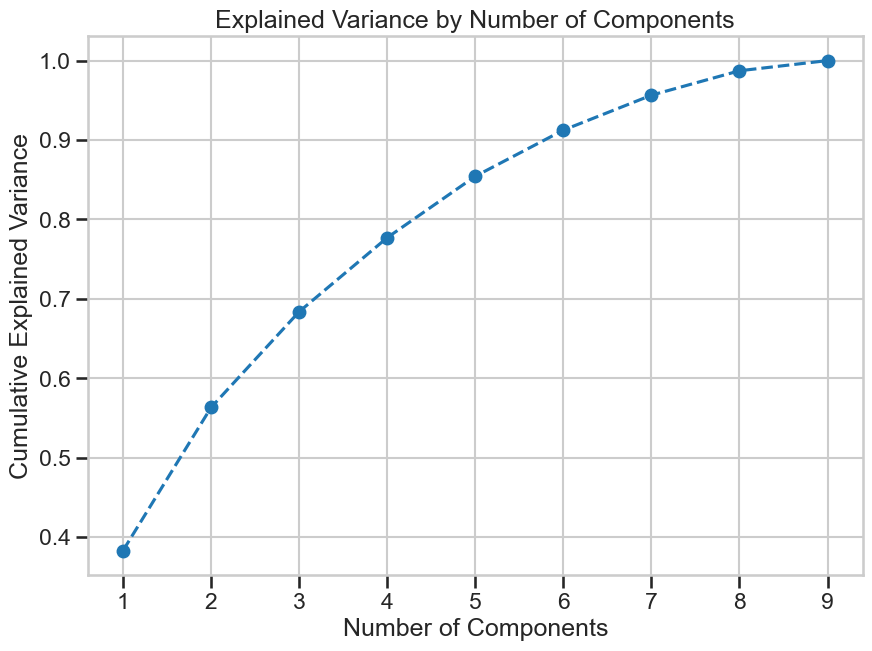

In [18]:
pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(features) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

To help out with visualization:

In [12]:
pca_2 = PCA(n_components=2)
principal_components = pca_2.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,1.536648,0.017769
1,1.733209,-0.724620
2,-1.718397,-0.105202
3,-1.525501,-0.798694
4,-2.596392,-0.065317


Now we will move onto K means clustering. We will start by choosing a random K:

In [19]:
chosen_k = 5
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(pca_df)

Adding the cluster labels to the PCA dataframe:

In [15]:
pca_df['cluster'] = y_kmeans
pca_df.head()

,PC1,PC2,cluster
0,1.536648,0.017769,1
1,1.733209,-0.724620,1
2,-1.718397,-0.105202,3
3,-1.525501,-0.798694,3
4,-2.596392,-0.065317,0


Now we can properly visualize everything:

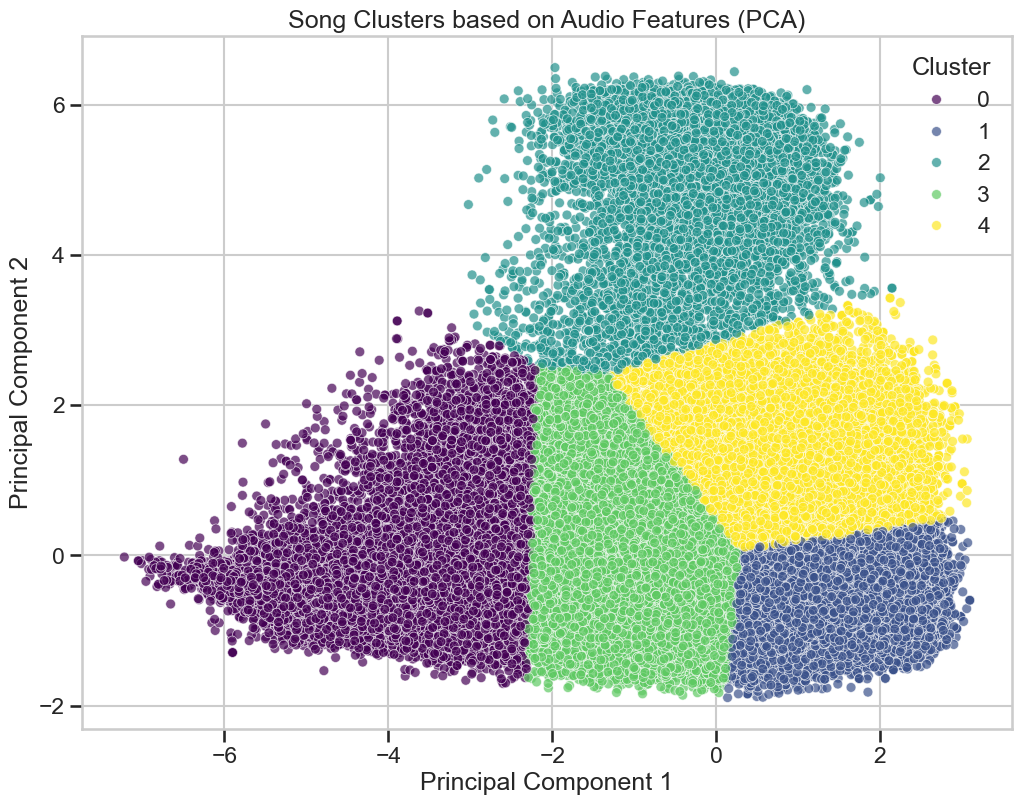

In [17]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50, alpha=0.7)
plt.title('Song Clusters based on Audio Features (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

What we see here is five clusters of datapoints based on audio features. By choosing 5 clusters, we ended up with these 5 distinct groups. These are most likely genres, though a higher k might result in more narrow genres. While we clustered into 5 groups, this would world with any other number of clusters. It could also be 5 different "moods" of music that are not necessarily explicitly divided by genre. This demonstrates how unsupervised learning can be used to find meaningful patterns in data without any pre-existing labels.